In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [16]:
data = pd.read_csv("student_data_1000.csv")
print("Первые 5 строк данных:")
print(data.head())

Первые 5 строк данных:
   grade  hours  olymp  admitted
0   4.25      6      0         1
1   3.93      0      2         0
2   4.32      7      1         1
3   4.76      2      1         1
4   3.88      5      2         1


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   grade     1000 non-null   float64
 1   hours     1000 non-null   int64  
 2   olymp     1000 non-null   int64  
 3   admitted  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB
None


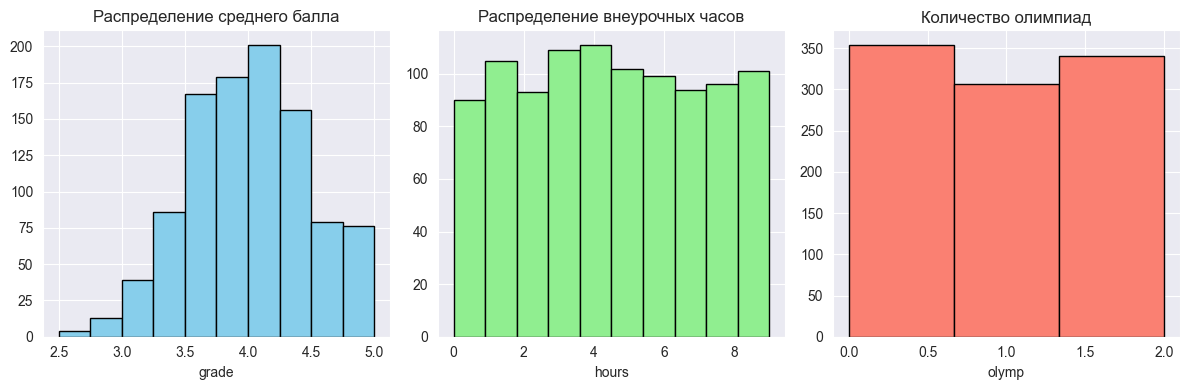

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['grade'], bins=10, color='skyblue', edgecolor='black')
plt.title("Распределение среднего балла")
plt.xlabel("grade")

plt.subplot(1, 3, 2)
plt.hist(data['hours'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Распределение внеурочных часов")
plt.xlabel("hours")

plt.subplot(1, 3, 3)
plt.hist(data['olymp'], bins=3, color='salmon', edgecolor='black')
plt.title("Количество олимпиад")
plt.xlabel("olymp")

plt.tight_layout()
plt.show()

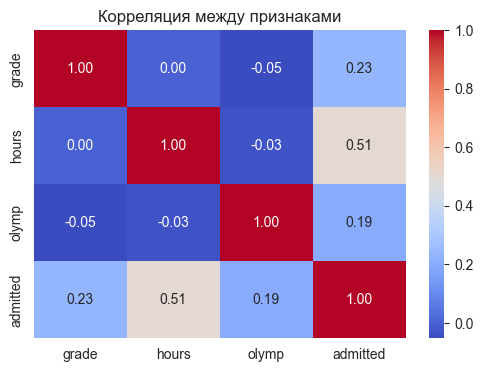

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между признаками")
plt.show()

In [20]:
X = data[['grade', 'hours', 'olymp']]
y = data['admitted']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy модели: {accuracy:.2f}")


Accuracy модели: 0.80


In [24]:
joblib.dump(model, 'student_model.pkl')
print("✅ Модель сохранена в student_model.pkl")

✅ Модель сохранена в student_model.pkl
